# Linear Regression

## import packages

In [8]:
#import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

#from sklearn.family import model
from sklearn.linear_model import LinearRegression 

import statsmodels.api as sm

## load data set and prepare it 

In [6]:
#load data set
from sklearn import datasets #import datasets module from sklearn
data=datasets.load_boston() #load boston house price dataset
print(type(data)) #this is bunch object , not a data frame
#print(data)

<class 'sklearn.utils.Bunch'>


<pre>
Note that data is special type of data structure called a "Bunch object".
A Bunch object is a simple container that stores the data in the form of key-value pairs. 
It has some similarities to a dictionary, but with some additional features, 
such as the ability to access values with dot notation.

</pre>

In [9]:
from sklearn import datasets

# Load the boston dataset
data = datasets.load_boston()

# Print the type of the data variable
print(type(data))

# Output:
# <class 'sklearn.utils.Bunch'>

# Print the keys in the iris variable
print(data.keys())

# Output:
# dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

# Print the shape of the data array
print(data.data.shape)

# Output:
# (506, 13)


<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
(506, 13)


In [11]:
print(data.data)
print(type(data.data))
print(data.data.shape)
'''
This key contains the actual data, 
which is stored as a numpy array or a sparse matrix. 
only independent variable's / feature's data
'''

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
<class 'numpy.ndarray'>
(506, 13)


"\nThis key contains the actual data, \nwhich is stored as a numpy array or a sparse matrix. \nonly independent variable's / feature's data\n"

In [12]:
print(data.target)
print(type(data.target))
print(data.target.shape)
'''
This key contains the target values or labels associated with each sample. 
the target values are usually stored as a numpy array or a pandas Series object. 
only contains the dependent variable's / label's / target's data
'''

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

"\nThis key contains the target values or labels associated with each sample. \nthe target values are usually stored as a numpy array or a pandas Series object. \nonly contains the dependent variable's / label's / target's data\n"

In [13]:
print(data.feature_names)
print(type(data.feature_names))
print(data.feature_names.shape)
'''
This key contains the names or labels associated with the target values. 
column names of the features / independent variable
'''

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
<class 'numpy.ndarray'>
(13,)


'\nThis key contains the names or labels associated with the target values. \ncolumn names of the features / independent variable\n'

In [14]:
print(data.DESCR)#This key contains a description of the dataset

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [15]:
print(data.filename)#This key contains the filename or path of the dataset

boston_house_prices.csv


In [16]:
print(data.data_module)#This key contains the module that provides the dataset.

sklearn.datasets.data


In [17]:
x=pd.DataFrame(data=data.data, columns=data.feature_names)
x
#this data frame contains only the independent variable's data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [18]:
y=pd.DataFrame(data=data.target,columns=["MEDV"])
y
#this data frame contains only the dependent variable's data

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


## Model fitting (Multiple Linear Regression)

In [19]:
#fit the model
from sklearn.linear_model import LinearRegression 

lm = LinearRegression()
model=lm.fit(x,y)
model

LinearRegression()

In [20]:
lm.coef_#coefficient of the model

array([[-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,
         2.68673382e+00, -1.77666112e+01,  3.80986521e+00,
         6.92224640e-04, -1.47556685e+00,  3.06049479e-01,
        -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
        -5.24758378e-01]])

In [21]:
lm.intercept_#beta_0 / intercept

array([36.45948839])

<pre>
MEDV = -0.108 x CRIM + 0.046 x ZN + 0.021 x INDUS + 2.687 x CHAS - 17.767 x NOX + 3.810 x RM + 0.001 x AGE - 1.476 x DIS + 0.306 x RAD - 0.012 x TAX - 0.953 x PTRATIO + 0.009 x B - 0.525 x LSTAT + 36.459

Where:

CRIM represents the per capita crime rate by town
ZN represents the proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS represents the proportion of non-retail business acres per town
CHAS represents the Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX represents the nitric oxides concentration (parts per 10 million)
RM represents the average number of rooms per dwelling
AGE represents the proportion of owner-occupied units built prior to 1940
DIS represents the weighted distances to five Boston employment centres
RAD represents the index of accessibility to radial highways
TAX represents the full-value property-tax rate per $10,000
PTRATIO represents the pupil-teacher ratio by town
B represents 1000(Bk - 0.63)^2 where Bk is the proportion of black people by town
LSTAT represents the % lower status of the population
And MEDV represents the target variable, which in this case is the median value of owner-occupied homes in $1000s.

</pre>

## Interpretation

<pre>
CRIM (per capita crime rate by town): A unit increase in the per capita crime rate is associated with a decrease of $108 in the median value of owner-occupied homes.

ZN (proportion of residential land zoned for lots over 25,000 sq.ft.): A unit increase in the proportion of residential land zoned for lots over 25,000 sq.ft. is associated with an increase of $46 in the median value of owner-occupied homes.

INDUS (proportion of non-retail business acres per town): A unit increase in the proportion of non-retail business acres per town is associated with an increase of $21 in the median value of owner-occupied homes.

CHAS (Charles River dummy variable): The coefficient for CHAS is positive, indicating that if the property bounds the Charles River (CHAS=1), the median value of owner-occupied homes is on average $2687 higher compared to properties that don't bound the river.

NOX (nitric oxides concentration): A unit increase in nitric oxides concentration is associated with a decrease of $17,767 in the median value of owner-occupied homes.

RM (average number of rooms per dwelling): A unit increase in the average number of rooms per dwelling is associated with an increase of $3,810 in the median value of owner-occupied homes.

AGE (proportion of owner-occupied units built prior to 1940): A unit increase in the proportion of owner-occupied units built prior to 1940 is associated with an increase of $0.001 in the median value of owner-occupied homes.

DIS (weighted distances to five Boston employment centres): A unit increase in the weighted distances to five Boston employment centres is associated with a decrease of $1,476 in the median value of owner-occupied homes.

RAD (index of accessibility to radial highways): A unit increase in the index of accessibility to radial highways is associated with an increase of $306 in the median value of owner-occupied homes.

TAX (full-value property-tax rate per $10,000): A unit increase in the full-value property-tax rate per $10,000 is associated with a decrease of $12 in the median value of owner-occupied homes.

PTRATIO (pupil-teacher ratio by town): A unit increase in the pupil-teacher ratio by town is associated with a decrease of $953 in the median value of owner-occupied homes.

B (proportion of black people by town): A unit increase in the proportion of black people by town is associated with an increase of $9 in the median value of owner-occupied homes.

LSTAT (% lower status of the population): A unit increase in the percentage of lower status of the population is associated with a decrease of $525 in the median value of owner-occupied homes.
</pre>

## Prediction

In [22]:
Predictions=lm.predict(x)#fitted values
print(Predictions[0:5])#print 1st 5 fitted values

[[30.00384338]
 [25.02556238]
 [30.56759672]
 [28.60703649]
 [27.94352423]]


## Goodness of fit

In [23]:
lm.score(x,y)#r^2 value

0.7406426641094095

<pre>
74.06% of the variance in the target variable (Median Value of owner-occupied homes in $1000s) can be explained by the independent variables included in the multiple linear regression model.
</pre>

## Regression diagnostics

### summary of the results of the regression analysis.

In [35]:
import statsmodels.api as sm
model=sm.OLS(endog=y, exog=sm.add_constant(x))
fitted=model.fit()
print(fitted.summary())

'''
The objective of these codes is to perform a linear regression analysis 
using the OLS method from the StatsModels library in Python, 
and to obtain a summary of the results of the regression analysis.

sm.OLS creates an OLS(Ordinary least square) model object from the StatsModels library.
endog is the dependent variable, or the variable we are trying to predict. 
exog is the independent variable, or the variable(s) we are using to predict the dependent variable.
sm.add_constant(x) adds a column  for the intercept term in the linear regression equation.

model.fit() fits the OLS model to the data by estimating the coefficients of the linear regression equation.
The fitted model is stored in the fitted variable.

fitted.summary() prints a summary of the results of the regression analysis.
'''

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 28 Feb 2023   Prob (F-statistic):          6.72e-135
Time:                        03:47:39   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

'\nThe objective of these codes is to perform a linear regression analysis \nusing the OLS method from the StatsModels library in Python, \nand to obtain a summary of the results of the regression analysis.\n\nsm.OLS creates an OLS(Ordinary least square) model object from the StatsModels library.\nendog is the dependent variable, or the variable we are trying to predict. \nexog is the independent variable, or the variable(s) we are using to predict the dependent variable.\nsm.add_constant(x) adds a column  for the intercept term in the linear regression equation.\n\nmodel.fit() fits the OLS model to the data by estimating the coefficients of the linear regression equation.\nThe fitted model is stored in the fitted variable.\n\nfitted.summary() prints a summary of the results of the regression analysis.\n'

### Plot a correlation matric to check for multicollinearity

In [36]:
import seaborn as sns #plotting the correlation matrix
corr = x.corr()
print(corr)

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

<AxesSubplot:>

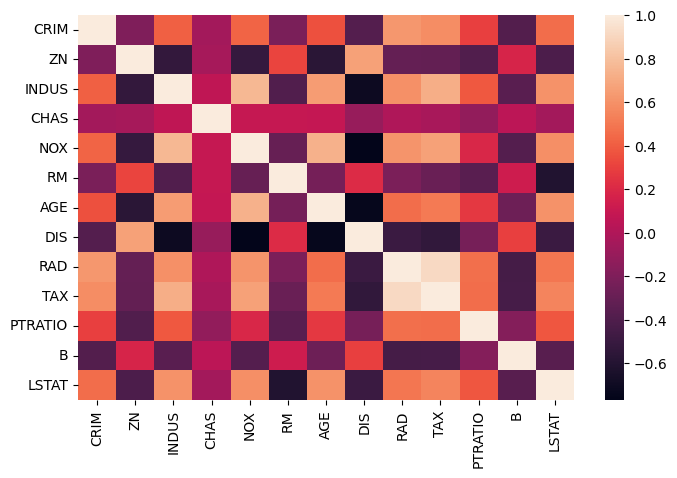

In [30]:
plt.figure(figsize=(8,5))
sns.heatmap(corr,xticklabels=corr.columns.values, yticklabels=corr.columns.values )


the variables "RAD" (index of accessibility to radial highways) and "TAX" (full-value property-tax rate per $10,000) are highly correlated




### plot scatter plots

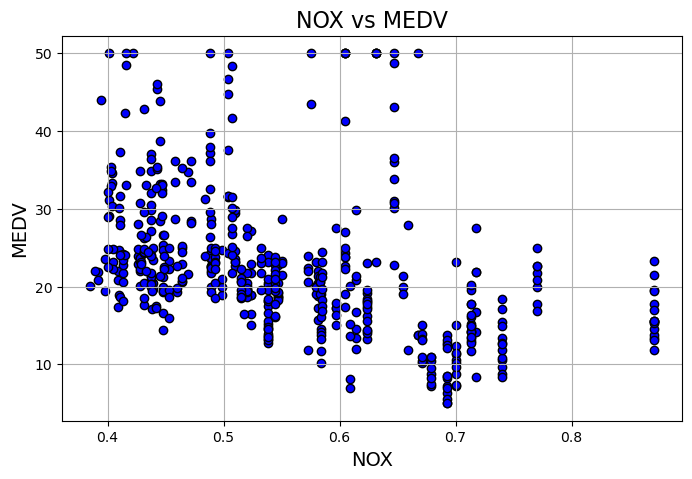

In [31]:
import matplotlib.pyplot as plt # to plot scatter plots
plt.figure(figsize=(8,5))
plt.title("NOX vs MEDV",fontsize=16)
plt.scatter(x=x.iloc[:,4],y=y,color='blue',edgecolor='k')
plt.grid(True)
plt.xlabel("NOX",fontsize=14)
plt.ylabel('MEDV',fontsize=14)
plt.show()

<AxesSubplot:xlabel='NOX', ylabel='MEDV'>

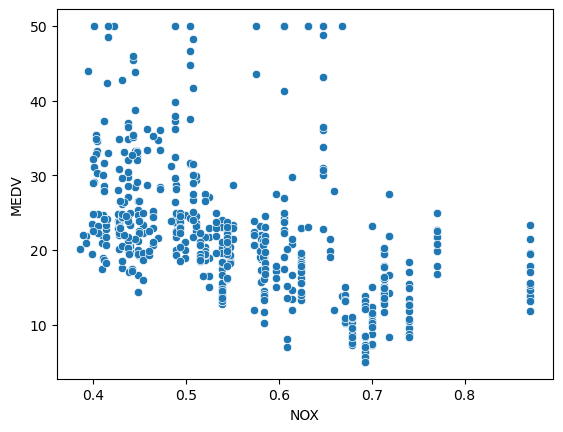

In [52]:

x = pd.DataFrame(data=data.data, columns=data.feature_names)
y = pd.DataFrame(data=data.target, columns=["MEDV"])

# Concatenate the features and target dataframes
df = pd.concat([x, y], axis=1)

# Create scatterplot
sns.scatterplot(x="NOX", y="MEDV", data=df)

# Add trendline
#sns.regplot(x="NOX", y="MEDV", data=df, scatter=False, color='red')


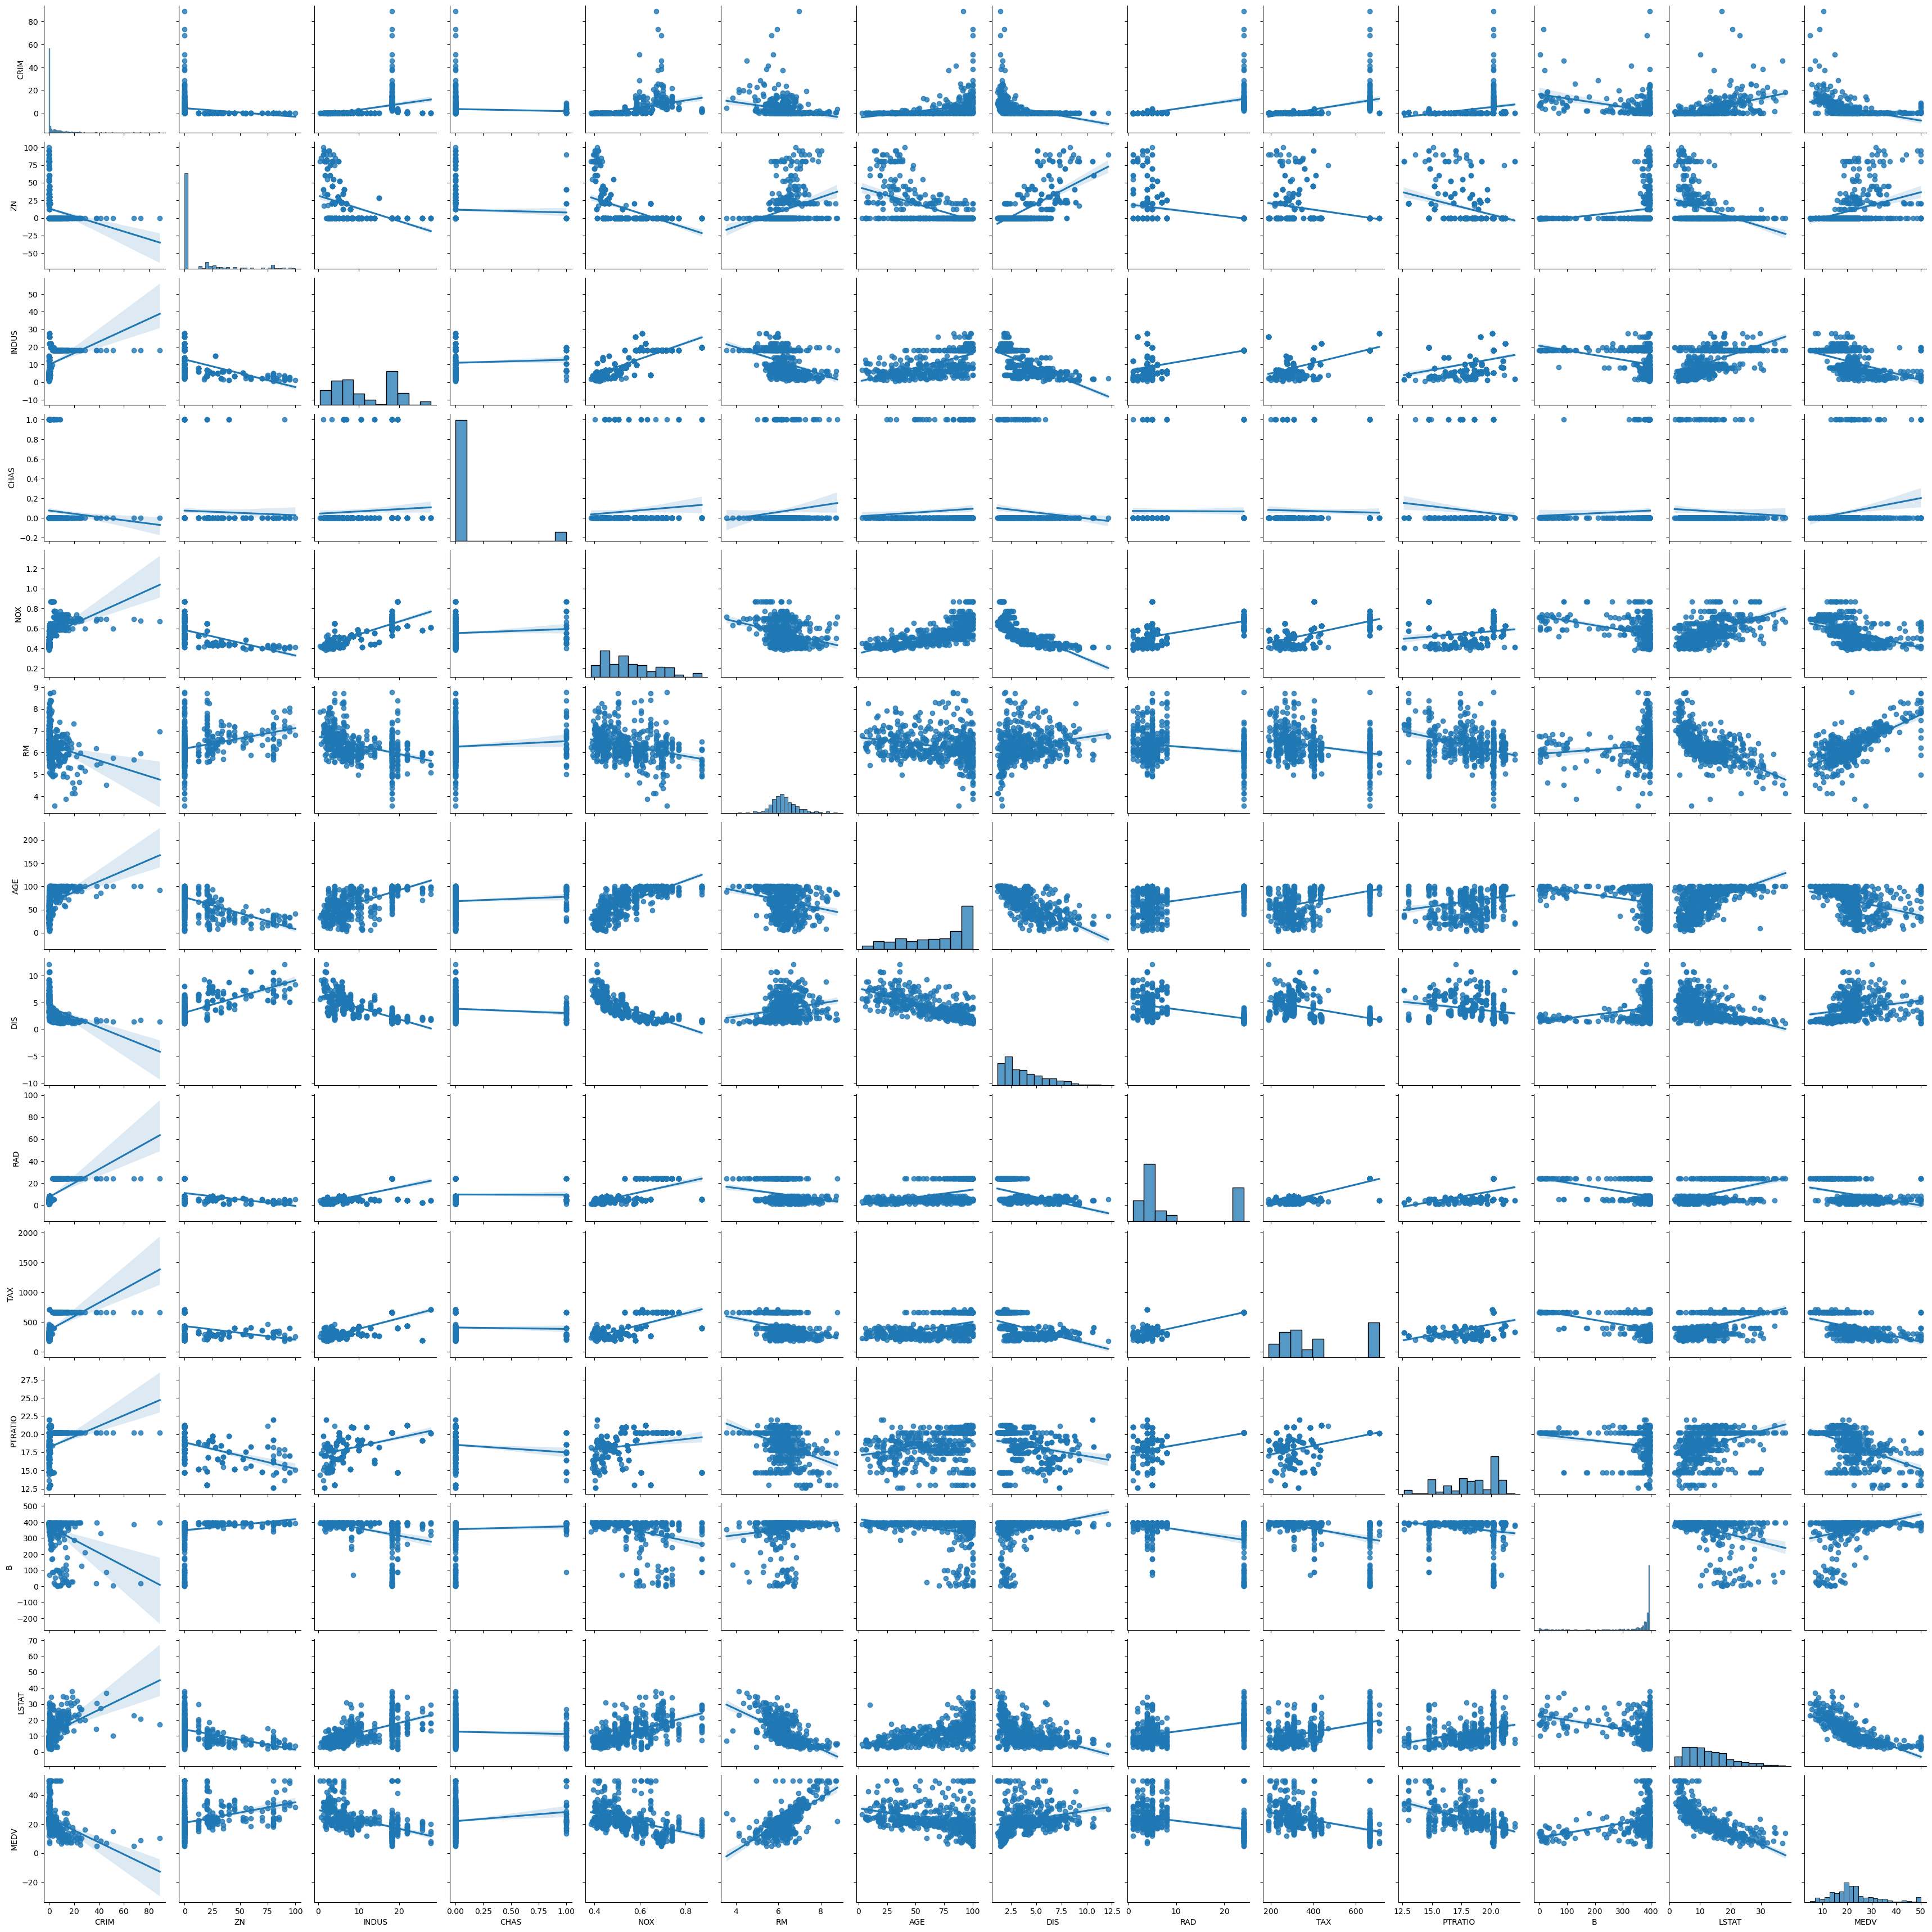

In [50]:
# Create the pairplot with a trendline
sns.pairplot(data=df,kind="reg")

### Fitted vs. residuals plot (Checking linearity & heteroscedasticity)

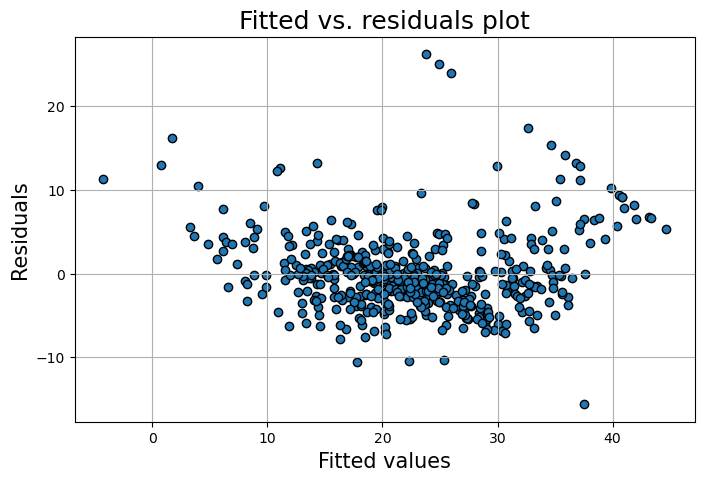

In [37]:
plt.figure(figsize=(8,5)) # plot residuals vs fitted values
p=plt.scatter(x=fitted.fittedvalues,y=fitted.resid,edgecolor='k')
plt.xlabel("Fitted values",fontsize=15)
plt.ylabel("Residuals",fontsize=15)
plt.title("Fitted vs. residuals plot",fontsize=18)
plt.grid(True)
plt.show()


### Checking for independence of the model Residuals vs. time plots

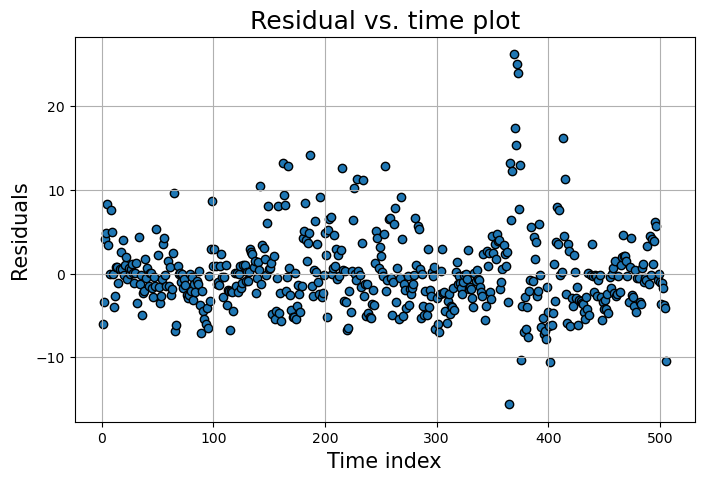

In [51]:
#correlation or error terms 
plt.figure(figsize=(8,5))
p=plt.scatter(x=np.arange(1,507,1),y=fitted.resid,edgecolor='k')
plt.xlabel("Time index",fontsize=15)
plt.ylabel("Residuals",fontsize=15)
plt.title("Residual vs. time plot",fontsize=18)
plt.grid(True)
plt.show()


### Checking for normality assumption using Q-Q plot 

<Figure size 800x500 with 0 Axes>

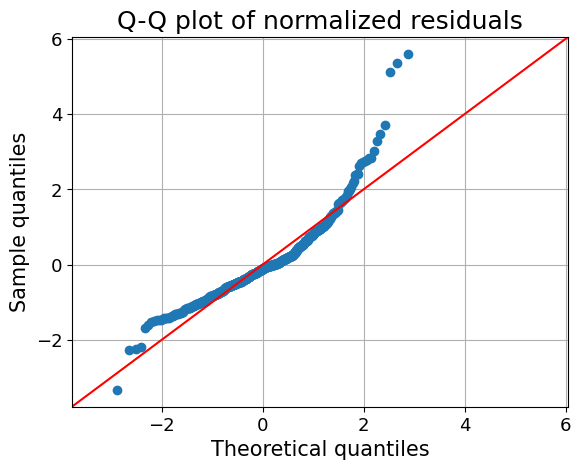

In [39]:
from statsmodels.graphics.gofplots import qqplot
plt.figure(figsize=(8,5))
fig=qqplot(fitted.resid_pearson,line='45',fit='True')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Theoretical quantiles",fontsize=15)
plt.ylabel("Sample quantiles",fontsize=15)
plt.title("Q-Q plot of normalized residuals",fontsize=18)
plt.grid(True)
plt.show()


### Histogram of residuals

C:\Users\Fathir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

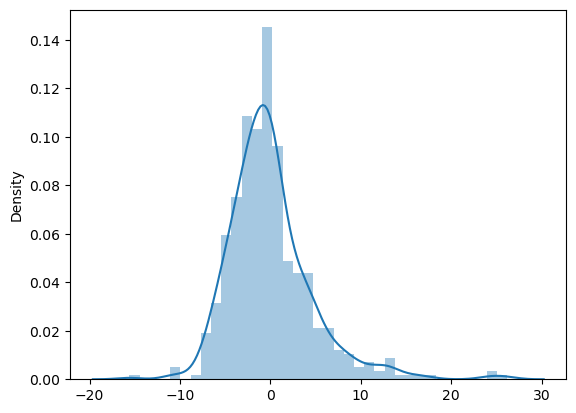

In [41]:
sns.distplot(fitted.resid)